***
__Summary GRU Train (80%) and Test (20%)__
- Dataset: Data_stock_VJC_VN.csv
***
__Evaluation__
- RMSE: 1697.52
- MAPE: 0.99987 %
- MSLE: 0.00025
***

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
# Import data and assign index with 'close' price
data = pd.read_csv('../Dataset/Data_stock_VJC_VN.csv')
df = data.reset_index()['close']

In [3]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# Split train, test and validate with ratio 8:2
split = int(len(df) * 0.8)
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:split]
test_data = df[split:]

In [5]:
# Create a function to convert an array of values into a dataset matrix
def create_sequences(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        x, y = dataset[i:(i+time_step), 0], dataset[i + time_step, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [6]:
# Reshape
time_step = 100
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 0.1179 - val_loss: 0.0272
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0169 - val_loss: 0.0063
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0070 - val_loss: 0.0061
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2

In [10]:
y_test_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


In [11]:
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [12]:
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))

# Calculate MAPE
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100

# Calculate MLSE
test_mlse = mean_squared_log_error(y_test, y_test_pred)

print("RMSE:", test_rmse)
print("MAPE:", test_mape, "%")
print("MSLE:", test_mlse)

RMSE: 1697.5244892807316
MAPE: 0.9998786238448194 %
MSLE: 0.00025259112027029837


In [13]:
last_sequence = X_test[-1]
predict_90_days = []
for _ in range(90):
    input_data = last_sequence.reshape((1, time_step, 1))
    predicted_price = model.predict(input_data)[0, 0]
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_price
    predict_90_days.append(predicted_price)

predict_90_days = scaler.inverse_transform(np.array(predict_90_days).reshape(-1, 1))
predict_90_days = predict_90_days.reshape(-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

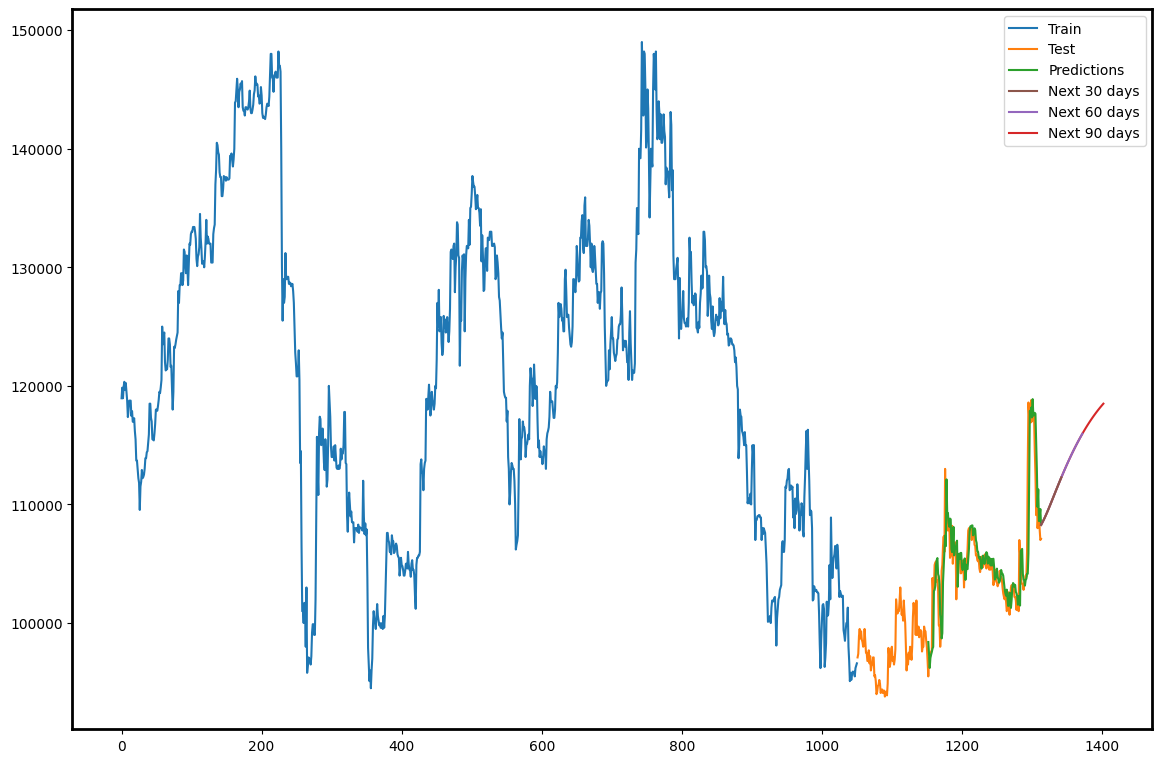

In [14]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_data_index,scaler.inverse_transform(train_data), label="Train")
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
line2, = plt.plot(test_data_index,scaler.inverse_transform(test_data), label='Test')
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
line3, = plt.plot(test_data_index,y_test_pred, label='Predictions')
predict_90_days_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+89, step=1)
line4, = plt.plot(predict_90_days_index, predict_90_days[:90], label="Next 90 days")
predict_60_days_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+59, step=1)
line5, = plt.plot(predict_60_days_index, predict_90_days[:60], label="Next 60 days")
predict_30_days_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+29, step=1)
line6, = plt.plot(predict_30_days_index, predict_90_days[:30], label="Next 30 days")
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("GRU_VJC_82.png")
plt.show()